In [ ]:
pip install yfinance

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np

In [21]:
# Function to load data
def read_data(stock_list, start_date, end_date):
    df = pd.DataFrame()
    for ticker in stock_list:
        df[ticker] = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    return df

In [22]:
def RSI(price_data, window=14):
    delta = price_data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))


In [28]:
# Parameters
portfolio = 1000
start_date = '2020-01-01'
end_date = '2022-01-01'
stock_list = ['RELIANCE.NS']
window = 14

# Load data
prices = read_data(stock_list, start_date, end_date)
print(prices)

# Initialize NAV DataFrame
nav = pd.DataFrame(index=prices.index)
nav = nav.assign(leftover=0, stock=0)
nav.iloc[0, 0] = portfolio
nav

[*********************100%%**********************]  1 of 1 completed

            RELIANCE.NS
Date                   
2020-01-01  1360.645142
2020-01-02  1383.809326
2020-01-03  1385.476807
2020-01-06  1353.344604
2020-01-07  1374.165283
...                 ...
2021-12-27  2172.949463
2021-12-28  2198.755859
2021-12-29  2202.514893
2021-12-30  2162.727539
2021-12-31  2171.024170

[499 rows x 1 columns]


,leftover,stock
Date,,
2020-01-01,1000,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-06,0,0
2020-01-07,0,0
...,...,...
2021-12-27,0,0
2021-12-28,0,0
2021-12-29,0,0


In [ ]:
for i in range(1, len(prices)):
    current_price = prices.iloc[i, 0]
    rsi = RSI(prices.iloc[:i, 0], window=window).iloc[-1]

    signal = np.sign(rsi - 50)  # Simplified RSI signal
    prev_signal = np.sign(RSI(prices.iloc[:i-1, 0], window=window).iloc[-1] - 50) if i > 1 else 0

    leftover = nav.iloc[i-1, 0]
    stock = nav.iloc[i-1, 1]

    if signal == 1 and prev_signal <= 0:  # Buy signal
        if leftover >= current_price:
            nav.iloc[i, 0] = leftover - current_price
            nav.iloc[i, 1] = stock + 1
        else:
            nav.iloc[i, 0] = leftover
            nav.iloc[i, 1] = stock
    elif signal == -1 and prev_signal >= 0:  # Sell signal
        if stock > 0:
            nav.iloc[i, 0] = leftover + current_price
            nav.iloc[i, 1] = stock - 1
        else:
            nav.iloc[i, 0] = leftover
            nav.iloc[i, 1] = stock
    else:  # Hold
        nav.iloc[i, 0] = leftover
        nav.iloc[i, 1] = stock

# Calculate final portfolio value
final_portfolio_value = nav.iloc[-1, 0] + nav.iloc[-1, 1] * prices.iloc[-1, 0]
net_profit = final_portfolio_value - portfolio
print(f'Final portfolio value: {final_portfolio_value}')
print(f'Net profit {net_profit}')

<Axes: xlabel='Date'>

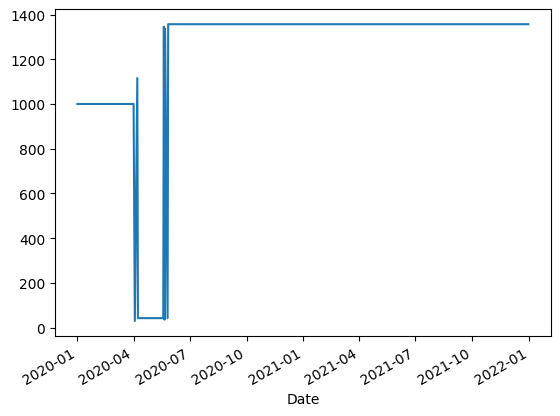

In [30]:
nav.sum(axis=1).plot()